In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [6]:
def init_centroids(X, K):
    # Randomly shuffle the dataset
    X = X.copy()
    np.random.shuffle(X)
    # Take the first K examples as centroids
    return X[:K]

def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0], dtype=int)
    for i in range(X.shape[0]):
        min_dist = float('inf')
        for j in range(K):
            dist = np.sum((X[i] - centroids[j]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx

def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx == k]
        centroids[k] = np.mean(points, axis=0)
    return centroids

def run_k_means(X, initial_centroids, max_iters):
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return idx, centroids

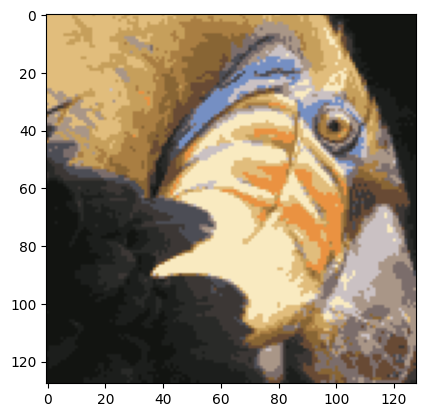

In [7]:
image_data = loadmat('bird_small.mat')
image_data
A = image_data['A']
A.shape
# normalize value ranges
A = A / 255.

# reshape the array
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))

# randomly initialize the centroids
initial_centroids = init_centroids(X, 16)

# run the algorithm
idx, centroids = run_k_means(X, initial_centroids, 10)

# get the closest centroids one last time
idx = find_closest_centroids(X, centroids)

# map each pixel to the centroid value
X_recovered = centroids[idx.astype(int),:]

# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))

plt.imshow(X_recovered)

In [8]:
data = loadmat('ex7data1.mat')
X = data['X']

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:, 0], X[:, 1])
def pca(X):
    # normalize the features
    X = (X - X.mean()) / X.std()

    # compute the covariance matrix
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]

    # perform SVD
    U, S, V = np.linalg.svd(cov)

    return U, S, V

U, S, V = pca(X)
U, S, V


def project_data(X, U, k):
    U_reduced = U[:,:k]
    return np.dot(X, U_reduced)

Z = project_data(X, U, 1)
Z
def recover_data(Z, U, k):
    U_reduced = U[:,:k]
    return np.dot(Z, U_reduced.T)

X_recovered = recover_data(Z, U, 1)
X_recovered

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_recovered[:, 0], X_recovered[:, 1])

FileNotFoundError: [Errno 2] No such file or directory: 'ex7data1.mat'